<a href="https://colab.research.google.com/github/inagib21/TweetSentiment/blob/main/UpdatedNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding:
In today's highly connected world, social media platforms such as Twitter have become a crucial tool for businesses to understand how their brand and products are perceived by their customers. Sentiment analysis is the process of using natural language processing (NLP) techniques to extract subjective information from text and determine the sentiment behind it. By performing sentiment analysis on social media data, businesses can gain valuable insights into their customers' opinions and experiences, which can inform their marketing strategies and help them to make more informed business decisions.

In this project, we will be conducting a sentiment analysis of tweets related to the South by Southwest (SXSW) conference. The SXSW conference is an annual event that showcases the latest trends in technology, music, and film. By analyzing tweets related to the conference, we aim to gain insights into how attendees and the wider public perceive the event and the brands and products showcased there. This information can be used by event organizers and exhibitors to improve the attendee experience and better understand the needs and preferences of their target audience.


In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
 

In [2]:
#getting the data
df = pd.read_csv('Tweet.csv', encoding='ISO-8859-1')

In [3]:
#Viewing our data frame
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Lets Rename our columns to 

In [4]:
#Renaming columns
df.columns = ['Tweet', 'Product/Brand', 'Emotion']
df.head()

,Tweet,Product/Brand,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
#Viewing shape of our data
df.shape

(9093, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
df['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [8]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

the column : 'Product/Brand' seems to have about 6,0000 missing values. The 'Tweet' column also seems to have 1 missing value. for now lets just drop the missing tweet. Also lets inspect the Tweets that are missing values in the Producct/Brand column.  To handle the missing data in the 'emotion_in_tweet_is_directed_at' columm we will be using the KNNImputer

In [9]:
#Dropping Missing Tweet
df.dropna(subset=['Tweet'], inplace=True)

In [10]:
# Inspecting Missing Products
df[df['Product/Brand'].isna()].head(20)

,Tweet,Product/Brand,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
34,Anyone at #SXSW who bought the new iPad want ...,NaN,No emotion toward brand or product
35,At #sxsw. Oooh. RT @mention Google to Launch ...,NaN,No emotion toward brand or product
37,SPIN Play - a new concept in music discovery f...,NaN,No emotion toward brand or product
39,VatorNews - Google And Apple Force Print Media...,NaN,No emotion toward brand or product
41,HootSuite - HootSuite Mobile for #SXSW ~ Updat...,NaN,No emotion toward brand or product
42,Hey #SXSW - How long do you think it takes us ...,NaN,No emotion toward brand or product


In [11]:
#converting to String
df['Tweet'] = df['Tweet'].apply(lambda x: str(x))
df['Product/Brand'] = df['Product/Brand'].astype(str)


In [12]:
# Brand name mapping
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }
df['Brand'] = df['Product/Brand'].map(brand)

In [13]:
# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'confused'}

df['Emotion'] = df['Emotion'].map(label_encoder)
# drop the rows containing 'confused' labels
df = df[df['Emotion'] != 'confused']
   

In [14]:
#Viewing shape again
df.shape

(8936, 4)

In [15]:
#Dropping Product/Brand Column
df.drop(columns='Product/Brand',inplace=True)

<ipython-input-15-fce0f39c289f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Product/Brand',inplace=True)


In [16]:
# viewing the head of our df
df.head()

,Tweet,Emotion,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,negative,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,positive,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,positive,apple
3,@sxsw I hope this year's festival isn't as cra...,negative,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,positive,google


In [17]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    8936 non-null   object
 1   Emotion  8936 non-null   object
 2   Brand    8936 non-null   object
dtypes: object(3)
memory usage: 279.2+ KB


### Distribution of Emotions in SXSW Tweets:

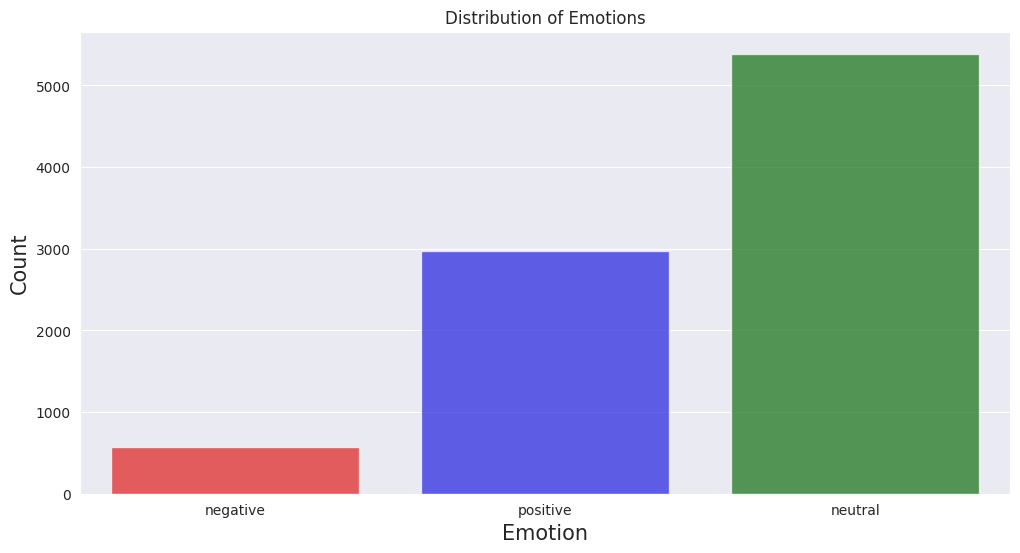

In [18]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Emotion', data=df,  
              palette={'positive':'b', 'negative':'r', 'neutral':'g'}, alpha=0.7)
plt.xlabel('Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Emotions');

### Distribution of Brands in Tweets:

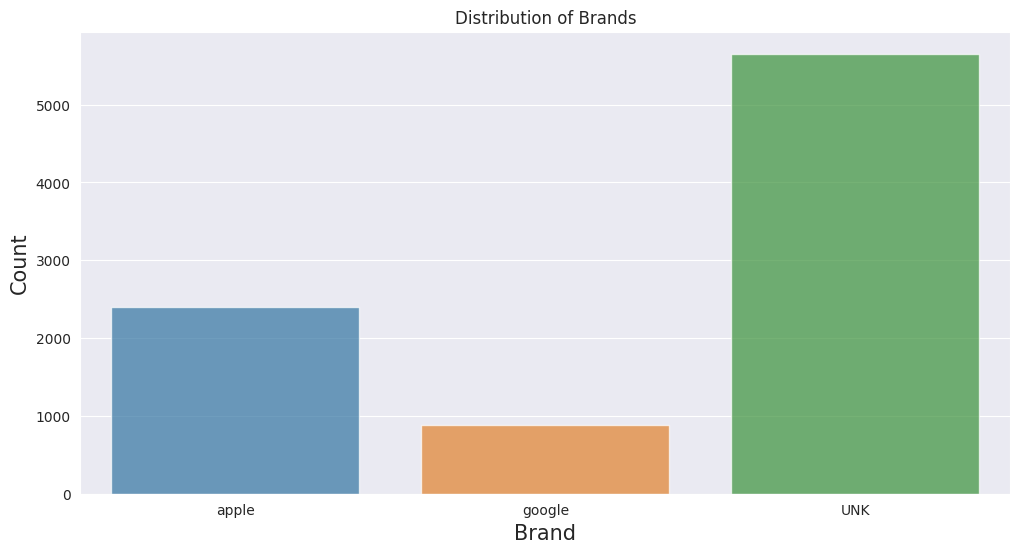

In [19]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Brand', data=df, alpha=0.7)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Brands');

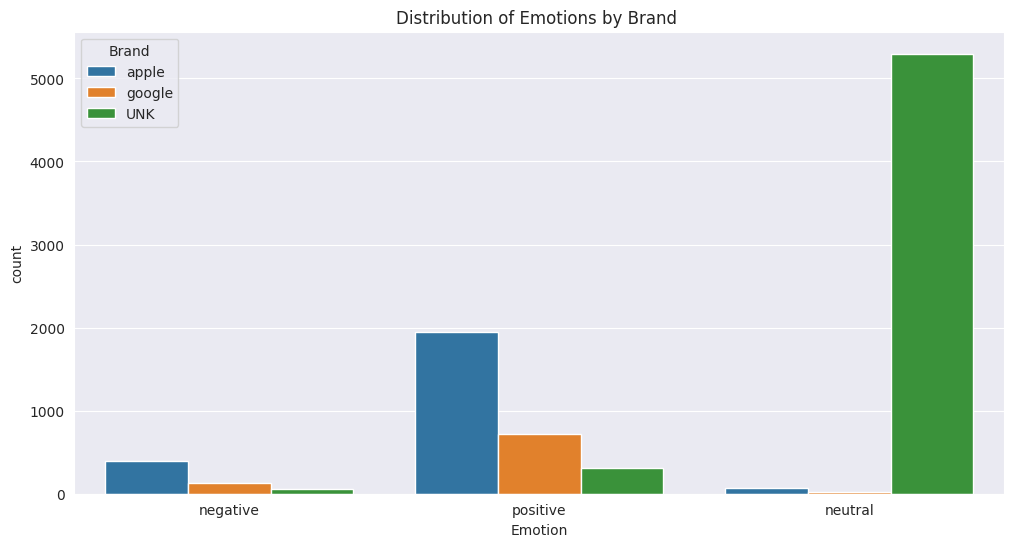

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'Emotion', hue='Brand')
plt.title('Distribution of Emotions by Brand ');

This function below takes in a pandas dataframe (df) and a dictionary mapping brand names to categories (brand). For each row in the dataframe, the function checks if the 'Brand' column is labeled as 'UNK' (unknown). If it is, the function extracts the text from the 'Tweet' column and checks if it contains any of the brand names in the dictionary. If a match is found, the function updates the 'Brand' column with the mapped category value and moves on to the next row. If no match is found or if both brands are found, the 'Brand' column remains labeled as 'UNK'. Finally, the function returns the updated dataframe.

In [21]:
def reduce_unknown_brands(df, brand):
    # Iterate through each row in the dataframe
    for i in df.index:
        # Check if the 'Brand' column is labeled 'UNK'
        if df.at[i, 'Brand'] == 'UNK':
            # Extract the text from the 'Tweet' column
            text = df.at[i, 'Tweet']
            # Initialize variables for both Apple and Google
            apple_present = False
            google_present = False
            # Iterate through the brand dictionary
            for key, val in brand.items():
                # Check if the brand name (key) is present in the text (case-insensitive)
                if key.lower() == "apple" and key.lower() in text.lower():
                    apple_present = True
                elif key.lower() == "google" and key.lower() in text.lower():
                    google_present = True
            # Update the 'Brand' column with the appropriate value based on which brand is present in the tweet text
            if apple_present and not google_present:
                df.at[i, 'Brand'] = brand['Apple']
            elif google_present and not apple_present:
                df.at[i, 'Brand'] = brand['Google']
            else:
                df.at[i, 'Brand'] = 'UNK'
    # Return the updated dataframe
    return df



In [22]:
new_df = reduce_unknown_brands(df, brand)


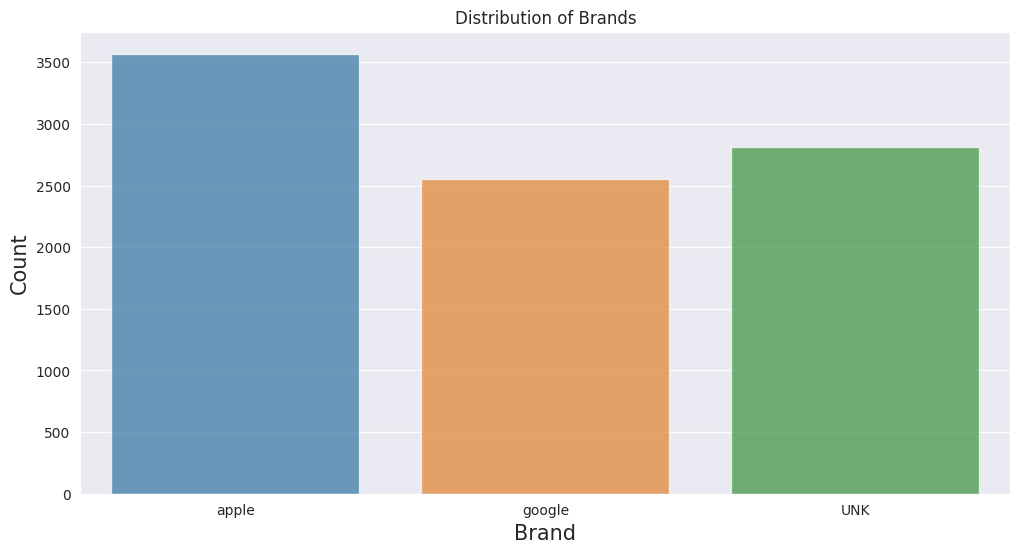

In [23]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Brand', data=new_df, alpha=0.7)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Brands');

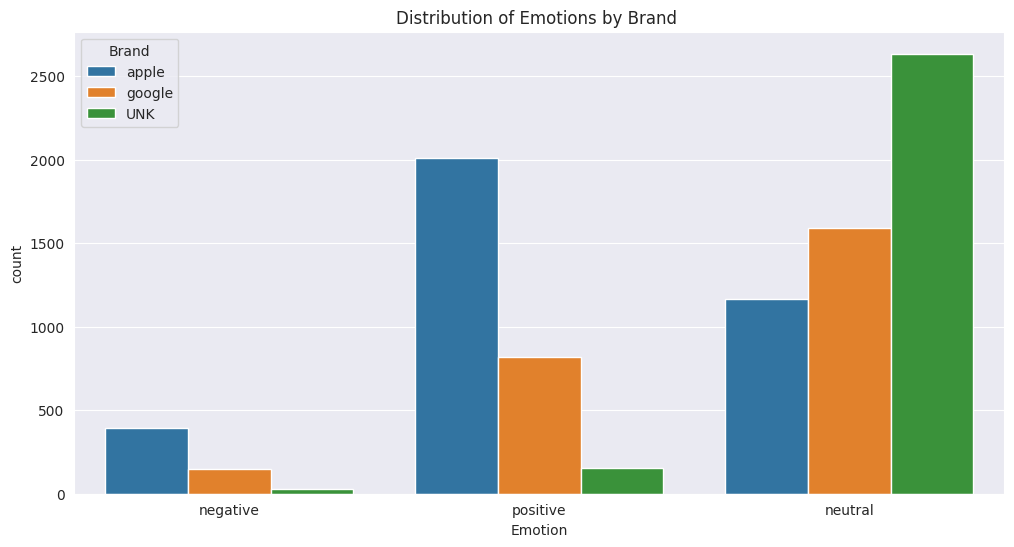

In [24]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=new_df, x = 'Emotion', hue='Brand')
plt.title('Distribution of Emotions by Brand ');

We can see the difference that our function made and now most of our tweets belong to the apple brand as opposed to being Unknown. 

### Data Preprocessing: 

In [25]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.0 MB/s eta 0:00:00


In [26]:
#import libraries
from nltk.tokenize import RegexpTokenizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator
import contractions


The contractions library is used to expand contractions in text data. A contraction is a shortened version of a word or group of words, where an apostrophe represents missing letters. For example, "I'm" is a contraction of "I am", "you're" is a contraction of "you are", and so on.

When working with text data, it's often useful to expand contractions because it can help to improve the accuracy of natural language processing (NLP) models, and it can also make text easier to read and understand. For example, if you're analyzing sentiment in social media data, it's important to expand contractions because "I'm happy" and "I am happy" have the same meaning, but a model may interpret them differently if contractions are not expanded.

In [27]:
# Apply contractions.fix() to each element in the 'Tweet' column
new_df['Tweet'] = new_df['Tweet'].apply(contractions.fix)

# View the updated DataFrame
print(new_df)

                                                  Tweet   Emotion   Brand
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...  negative   apple
1     @jessedee Know about @fludapp ? Awesome iPad/i...  positive   apple
2     @swonderlin Can not wait for #iPad 2 also. The...  positive   apple
3     @sxsw I hope this year's festival is not as cr...  negative   apple
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...  positive  google
...                                                 ...       ...     ...
9088                      Ipad everywhere. #SXSW {link}  positive   apple
9089  Wave, buzz... RT @mention We interrupt your re...   neutral  google
9090  Google's Zeiger, a physician never reported po...   neutral  google
9091  Some Verizon iPhone customers complained their...   neutral     UNK
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   neutral  google

[8936 rows x 3 columns]


the contractions library did a great job for the most part but we seill have to clean our text so lets create a function that does just that.

In [28]:
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import seaborn as sns
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')
lem = WordNetLemmatizer()

def clean_and_normalize(tweet, stop_words):
    '''
    Takes in a tweet and a list of stop words. Returns the cleaned and lemmatized tweet.
    '''
    x = tweet.lower()
    x = re.sub(r'http\S+', '', x)
    x = re.sub(r'@[A-Za-z0-9]+', '', x)
    x = re.sub(r'_[A-Za-z0-9]+', '', x)
    x = re.sub(r'[^\w\s]', '', x)
    x = re.sub(r'\d+', '', x)
    
    stop_words = set(stopwords.words('english'))
    extra_stopwords = ['rt', 'rts', 'retweet', 'quot', 'sxsw']
    stop_words.update(extra_stopwords)
    
    x = [word.lower() for word in x.split() if word.lower() not in stop_words]
    x = [lem.lemmatize(word, 'v') for word in x]
    x = [w for w in x if len(w)>2]
    
    return ' '.join(x)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
#apply function
new_df['Tweet'] = new_df['Tweet'].apply(clean_and_normalize, stop_words=stopwords.words('english'))


In [30]:
new_df['Tweet'].head()

0    iphone hrs tweet rise dead need upgrade plugin...
1    know awesome ipadiphone app likely appreciate ...
2                                  wait ipad also sale
3          hope years festival crashy years iphone app
4    great stuff fri marissa mayer google tim oreil...
Name: Tweet, dtype: object

In [31]:
# Word count of all the vocabulary
FreqDist(new_df['Tweet'].unique().sum().split())

FreqDist({'ipad': 1810, 'apple': 1306, 'link': 1278, 'google': 1265, 'store': 1131, 'iphone': 1039, 'new': 683, 'austin': 640, 'app': 589, 'amp': 531, ...})

In [32]:
# Create a frequency distribution of all the words
all_words = ' '.join(new_df['Tweet'].tolist()).split()
fdist = FreqDist(all_words)

In [33]:
# Get the 10 most common words
top_words = dict(fdist.most_common(10))

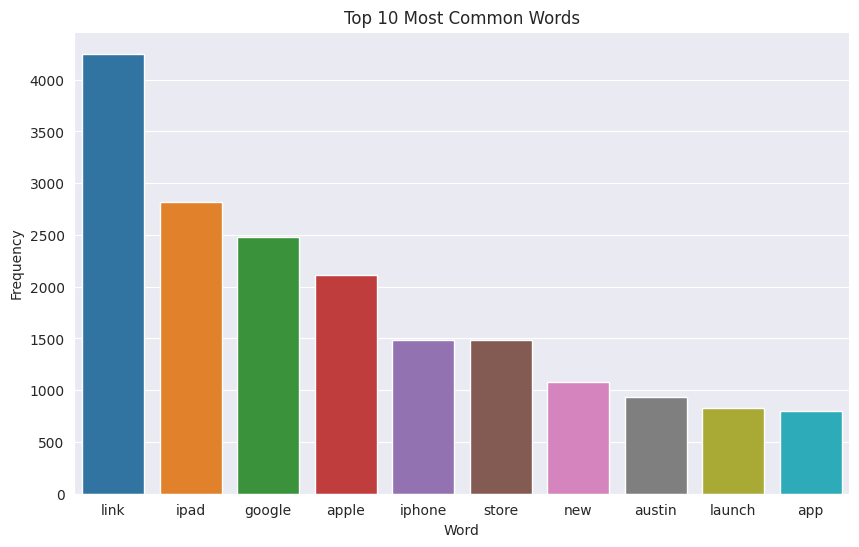

In [34]:

# Plot a bar chart of the top 10 words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [35]:
def plot_top_words(brand, emotion):
    
    # Subset the data based on brand and emotion
    df = new_df[(new_df['Brand'] == brand) & (new_df['Emotion'] == emotion)]

    # Concatenate all tweets into a single string
    all_tweets = ' '.join(df['Tweet'])

    # Tokenize the string into words
    words = all_tweets.split()

    # Remove stop words and non-alphabetic characters
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

    # Calculate word frequencies
    fdist = FreqDist(words)
    top_words = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])

    # Plot the top words
    sns.set(style="whitegrid")
    ax = sns.barplot(y="Frequency", x="Word", data=top_words, palette="Blues_d")
    ax.set_title(f"Top 10 words for {emotion} tweets about {brand}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Word")
    plt.xticks(rotation=45)
    plt.show()


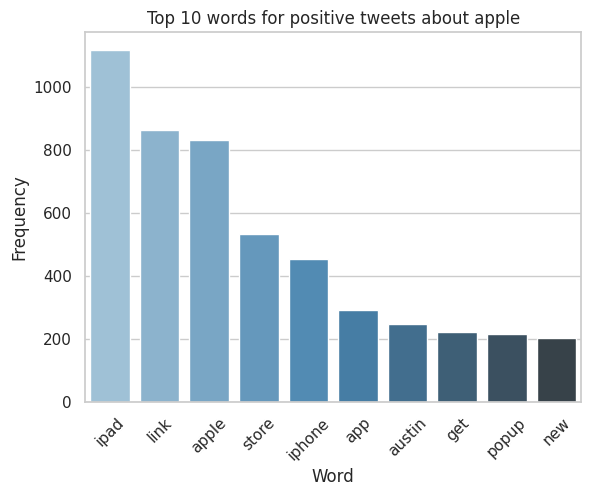

In [36]:
plot_top_words('apple', 'positive')

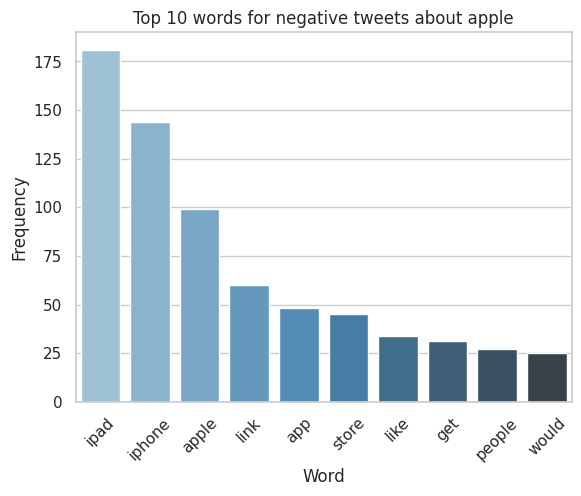

In [37]:
plot_top_words('apple', 'negative')

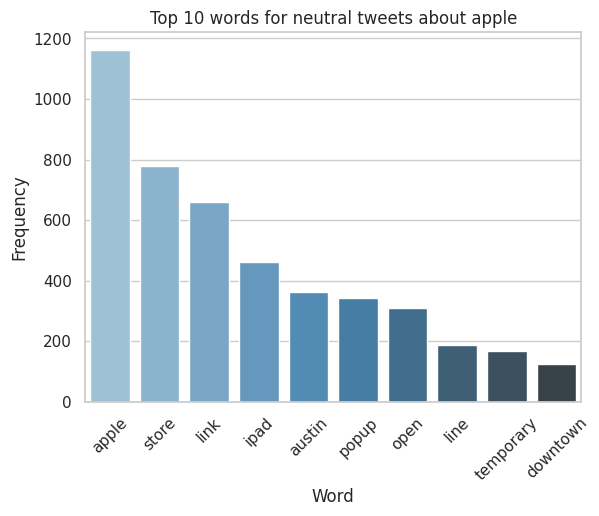

In [38]:
plot_top_words('apple', 'neutral')

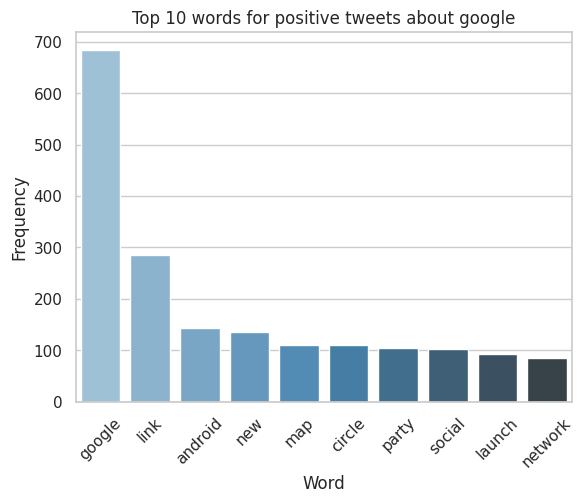

In [39]:
plot_top_words('google', 'positive')

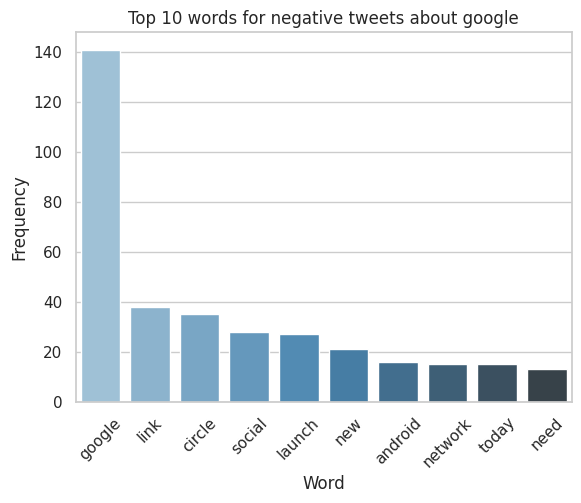

In [40]:
plot_top_words('google', 'negative')

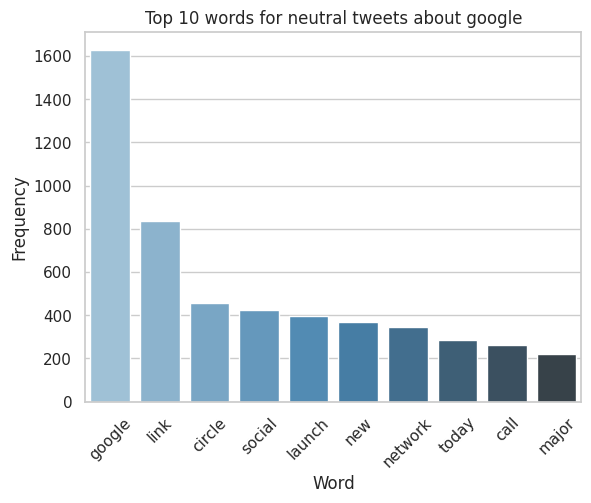

In [41]:

plot_top_words('google', 'neutral')


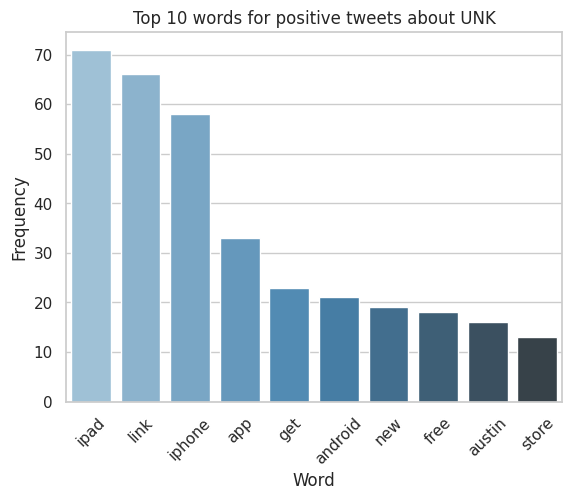

In [42]:
plot_top_words('UNK', 'positive')

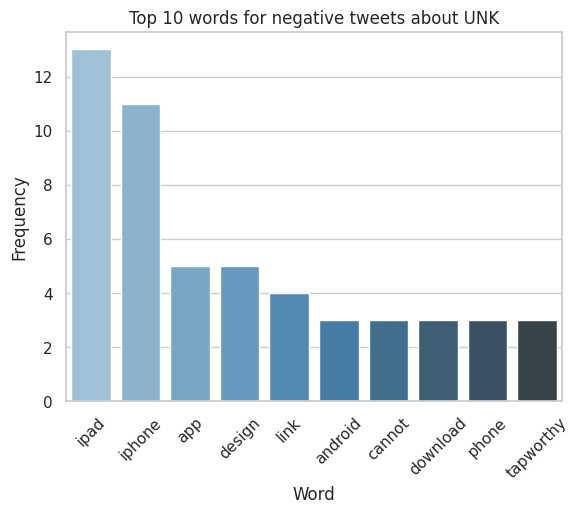

In [43]:
plot_top_words('UNK', 'negative')

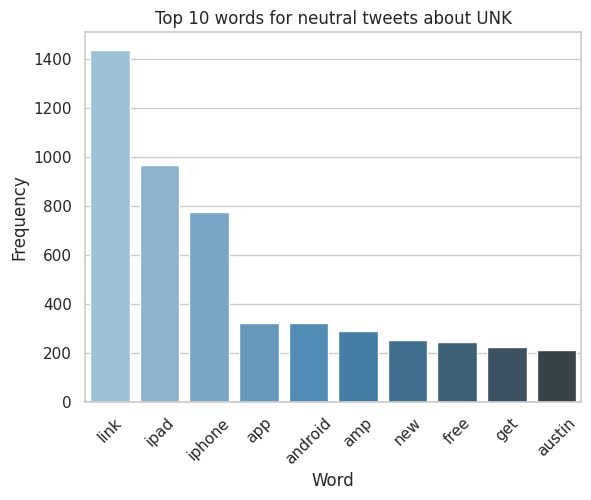

In [44]:
plot_top_words('UNK', 'neutral')

models require the target variable to be of integer type, so let's assign 0 to Negative emotion, 1 to No emotion toward brand or product and 2 to Positive emotion.


In [45]:
# Defining number map function

def number_map(x):
    if x == 'positive':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0

In [46]:
# Applying number map
new_df['Emotion'] = new_df['Emotion'].apply(number_map)

In [47]:
#Making sure number map works
new_df['Emotion'].value_counts()

1    5388
2    2978
0     570
Name: Emotion, dtype: int64

# Modeling:

We will now begin the modeling process after performing a train-test split. Our initial approach will be to use a Multinomial model, which will be complemented by the application of Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF is a statistical measure used to evaluate the significance of a word in a document or corpus. It assigns a weight to each term based on its frequency in the document and its rarity in the entire corpus. This weight reflects the importance of the term to the document, with higher weights indicating greater significance.

TF-IDF is commonly used to transform a collection of documents into a numerical feature vector. The feature vector can then be used as input to machine learning algorithms, such as random forest and XGBoost, for tasks like document classification, clustering, and information retrieval.

To address class imbalance, we will apply Random Oversampling after the application of TF-IDF. We will also perform a grid search on both random forest and XGBoost models to determine the best hyperparameters for each.



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
import nltk
from nltk import word_tokenize
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [49]:
# Load the data
X = new_df['Brand'] + ' ' + new_df['Tweet']
y = new_df['Emotion']


In [50]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)


## Baseline Model: 
Multinomial Naive Bayes (MNB) is a type of Naive Bayes algorithm, which is commonly used for text classification tasks. In MNB, the features (words or tokens) are modeled using a multinomial distribution, where each feature represents the frequency of a term in a document. The algorithm calculates the probabilities of each class based on the frequencies of the features in the training data. During prediction, it uses Bayes' theorem to calculate the probability of each class given the input features, and returns the class with the highest probability as the predicted class. MNB is a fast and simple algorithm that works well for text classification tasks with a large number of features.

In [51]:
# Create a pipeline for the TF-IDF vectorizer and Multinomial NB
nb_pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000,min_df=5,ngram_range=(1, 2)),
    RandomOverSampler(random_state=42),
    MultinomialNB()
)

In [52]:

# Fit the pipeline on the training data
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, min_df=5,
                                 ngram_range=(1, 2))),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('multinomialnb', MultinomialNB())])

In [53]:
# Predict on the validation data
y_pred_val = nb_pipeline.predict(X_val)

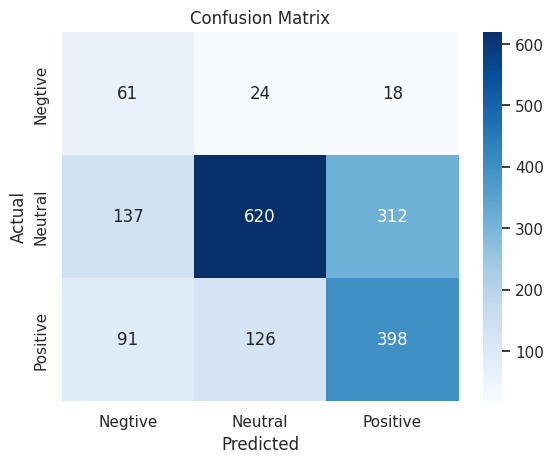

              precision    recall  f1-score   support

    Negative       0.21      0.59      0.31       103
     Neutral       0.81      0.58      0.67      1069
    Positive       0.55      0.65      0.59       615

    accuracy                           0.60      1787
   macro avg       0.52      0.61      0.53      1787
weighted avg       0.68      0.60      0.63      1787



In [54]:
# Print the confusion matrix on validation data
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_val, y_pred_val,target_names=['Negative','Neutral','Positive']))

In [55]:
# Predict on the test data
y_pred_nb = nb_pipeline.predict(X_test)

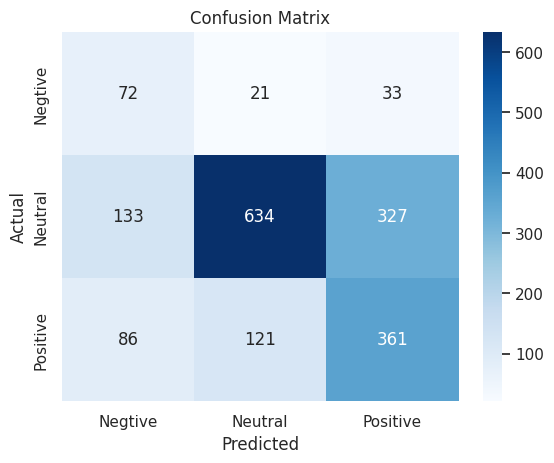

              precision    recall  f1-score   support

    Negative       0.25      0.57      0.35       126
     Neutral       0.82      0.58      0.68      1094
    Positive       0.50      0.64      0.56       568

    accuracy                           0.60      1788
   macro avg       0.52      0.60      0.53      1788
weighted avg       0.68      0.60      0.62      1788



In [56]:
# Print the confusion matrix on testing
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_nb,target_names=['Negative','Neutral','Positive']))

In [57]:
# Calculate the training and test loss for the NB Pipeline
train_loss_nb = nb_pipeline.score(X_train, y_train)
test_loss_nb = nb_pipeline.score(X_test, y_test)
print('Training Loss for NB Pipeline:', train_loss_nb)
print('Test Loss for NB Pipeline:', test_loss_nb)

Training Loss for NB Pipeline: 0.7241186345831002
Test Loss for NB Pipeline: 0.5967561521252797


The baseline model achieved an accuracy of 0.60 on the test set, with precision, recall, and F1-score for each sentiment class as follows:

- Negative: precision 0.25, recall 0.57, F1-score 0.35
- Neutral: precision 0.82, recall 0.58, F1-score 0.67
- Positive: precision 0.50, recall 0.64, F1-score 0.54
Overall, the model performed better in classifying neutral tweets than positive or negative ones. The macro average F1-score was 0.53, indicating that the model's performance was not well balanced across the classes. The weighted average F1-score was 0.62, suggesting that the model's performance was influenced more by the larger neutral class.

## XGBoost:
XGBoost (Extreme Gradient Boosting) is a popular gradient boosting library that can be used for classification and regression tasks. Like Random Forest, XGBoost is an ensemble learning method that combines multiple weak models (decision trees in this case) to create a stronger overall model.

The main difference between Random Forest and XGBoost lies in how they combine these weak models. In Random Forest, decision trees are built independently, whereas in XGBoost, they are built sequentially with a focus on reducing the errors made by the previous trees.

To achieve this, XGBoost uses a technique called gradient boosting, where each new tree is trained to correct the mistakes made by the previous trees. The predictions of all the trees are then added together to obtain the final prediction.

XGBoost also has several advanced features, such as regularization and parallel processing, which can improve its performance and scalability. These features make XGBoost a popular choice for many machine learning tasks, particularly those involving structured data.


In [58]:
# Create a pipeline for the TF-IDF vectorizer and XGBoost with random over-sampling

xgb_pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000,min_df=5,ngram_range=(1, 2)),
    RandomOverSampler(random_state=42),
    XGBClassifier()
)

In [59]:
# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, min_df=5,
                                 ngram_range=(1, 2))),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, e...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [60]:
# Predict on the validation data
y_pred_val_xgb = xgb_pipeline.predict(X_val)

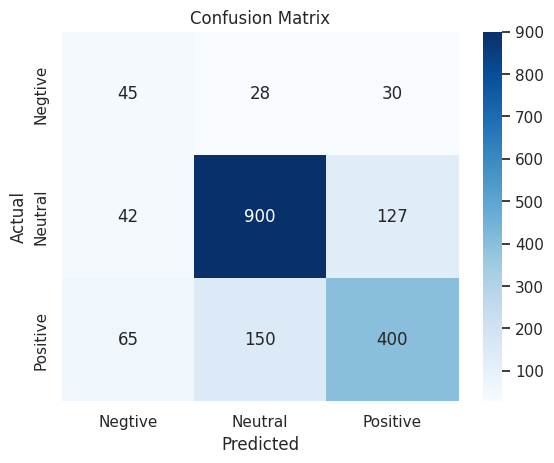

              precision    recall  f1-score   support

    Negative       0.30      0.44      0.35       103
     Neutral       0.83      0.84      0.84      1069
    Positive       0.72      0.65      0.68       615

    accuracy                           0.75      1787
   macro avg       0.62      0.64      0.62      1787
weighted avg       0.76      0.75      0.76      1787



In [61]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_val, y_pred_val_xgb,target_names=['Negative','Neutral','Positive']))

In [62]:
# Predict on the test data
y_pred_xgb = xgb_pipeline.predict(X_test)

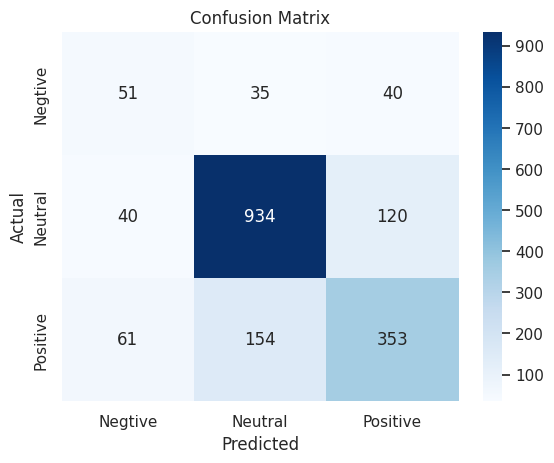

              precision    recall  f1-score   support

    Negative       0.34      0.40      0.37       126
     Neutral       0.83      0.85      0.84      1094
    Positive       0.69      0.62      0.65       568

    accuracy                           0.75      1788
   macro avg       0.62      0.63      0.62      1788
weighted avg       0.75      0.75      0.75      1788



In [63]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_xgb,target_names=['Negative','Neutral','Positive']))


Compared to our basline model. This XGBoost model perfomed better with weighted average F1 score of .75. Its doing a great job at predicting the neutral class but not as good on the negative and positive classess. 

In [64]:
# Calculate the training and test loss for the XGB Pipeline
train_loss_xgb = xgb_pipeline.score(X_train, y_train)
test_loss_xgb = xgb_pipeline.score(X_test, y_test)
print('Training Loss for XGB Pipeline:', train_loss_xgb)
print('Test Loss for XGB Pipeline:', test_loss_xgb)

Training Loss for XGB Pipeline: 0.9199776161163962
Test Loss for XGB Pipeline: 0.7483221476510067


# XGB grid

In [65]:
# Create the parameter grid for RandomizedSearchCV
params = {
    'tfidfvectorizer__max_features': [5000, 10000],
    'tfidfvectorizer__min_df': [3, 5],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [5, 9, 13],
    'xgbclassifier__learning_rate': [0.1, 0.01],
    'xgbclassifier__gamma': [0, 0.1, 0.5],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0],
    'xgbclassifier__scale_pos_weight': [1, 5, 10],
    'xgbclassifier__objective': ['multi:softmax', 'multi:softprob']
}


In [66]:
# Create the RandomizedSearchCV object
xgb_random = RandomizedSearchCV(xgb_pipeline, 
                                param_distributions=params, n_iter=50, cv=5, n_jobs=-1,verbose=2)

In [67]:
# Fit the grid search object to the training data
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[22:38:50] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer(max_features=5000,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_roun...
                                        'xgbclassifier__colsample_bytree': [0.8,
                                                                            1.0],
                                        'xgbclassifier__gamma': [0, 0.1, 0.5],
                                        'xgbclassifier__learning_rate': [0.1,
                                                                         0.01],
                                        'xgbclassifier__max_depth': [5, 9, 13],
                                        'xgbclassifier__n_estimators': [100,
                                                                        200],
                                        'xgbclassifier__objective': ['multi:softmax',
                                                                     'multi:softprob'],
                                        'xgbclassifier__scale_pos_weight': [1,
                                                                            5,
                                                                            10],
                                        'xgbclassifier__subsample': [0.8, 1.0]},
                   verbose=2)

In [68]:
# Print the best parameters and score
print('Best Parameters:', xgb_random.best_params_)
print('Best F1 Score:', xgb_random.best_score_)


Best Parameters: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__objective': 'multi:softprob', 'xgbclassifier__n_estimators': 200, 'xgbclassifier__max_depth': 13, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.5, 'xgbclassifier__colsample_bytree': 0.8, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__max_features': 5000}
Best F1 Score: 0.7754157335410552


In [69]:
# Predict on the test data with the best parameters
xgb_pred_random = xgb_random.predict(X_test)

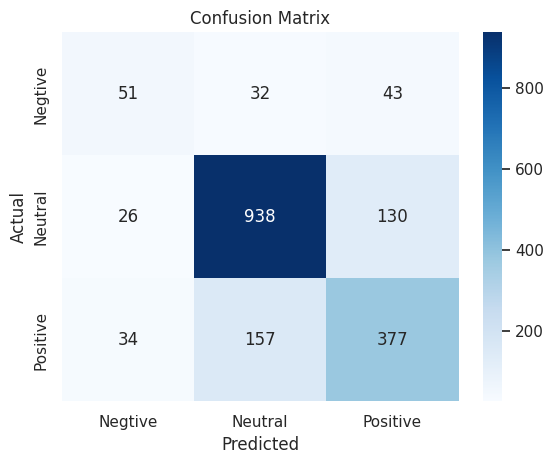

              precision    recall  f1-score   support

    Negative       0.46      0.40      0.43       126
     Neutral       0.83      0.86      0.84      1094
    Positive       0.69      0.66      0.67       568

    accuracy                           0.76      1788
   macro avg       0.66      0.64      0.65      1788
weighted avg       0.76      0.76      0.76      1788



In [70]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred_random)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, xgb_pred_random,target_names=['Negative','Neutral','Positive']))

In [71]:
# Calculate the training and test loss for the XGB Pipeline
train_loss_xgrid = xgb_random.score(X_train, y_train)
test_loss_xgrid = xgb_random.score(X_test, y_test)
print('Training Loss for XGB Pipeline:', train_loss_xgrid)
print('Test Loss for XGB Pipeline:', test_loss_xgrid)

Training Loss for XGB Pipeline: 0.9524342473419138
Test Loss for XGB Pipeline: 0.7639821029082774


## Random Forest
Random forest is a supervised learning algorithm that builds a large number of decision trees and combines their predictions to obtain a more accurate and stable prediction. Each tree in the random forest is built on a random subset of the data and a random subset of the features. This randomness helps to reduce overfitting and increase the generalization of the model. The output of a random forest is the mode of the predictions of the individual trees, in case of classification problems, or the mean of the predictions, in case of regression problems.

In [72]:
#RF# Create a pipeline for the TF-IDF vectorizer and Random Forest with random over-sampling

rf_pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000,min_df=5,ngram_range=(1, 2)),
    RandomOverSampler(random_state=42),
    RandomForestClassifier()
)

In [73]:
# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, min_df=5,
                                 ngram_range=(1, 2))),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier', RandomForestClassifier())])

In [74]:
# Predict on the validation data
y_pred_val_rf = rf_pipeline.predict(X_val)

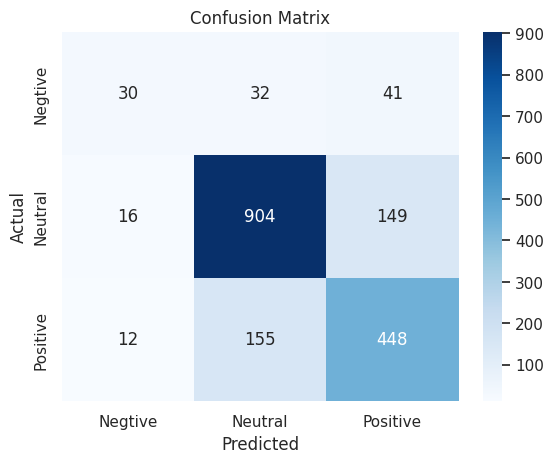

              precision    recall  f1-score   support

    Negative       0.52      0.29      0.37       103
     Neutral       0.83      0.85      0.84      1069
    Positive       0.70      0.73      0.72       615

    accuracy                           0.77      1787
   macro avg       0.68      0.62      0.64      1787
weighted avg       0.77      0.77      0.77      1787



In [75]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val_rf)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_val, y_pred_val_rf,target_names=['Negative','Neutral','Positive']))

In [76]:
# Predict on the test data
y_pred_rf = rf_pipeline.predict(X_test)

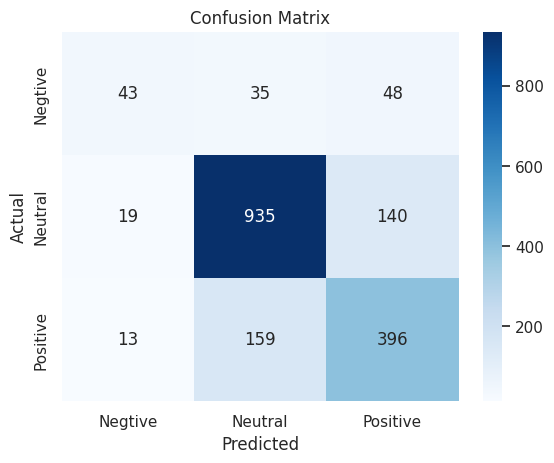

              precision    recall  f1-score   support

    Negative       0.57      0.34      0.43       126
     Neutral       0.83      0.85      0.84      1094
    Positive       0.68      0.70      0.69       568

    accuracy                           0.77      1788
   macro avg       0.69      0.63      0.65      1788
weighted avg       0.76      0.77      0.76      1788



In [77]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_rf,target_names=['Negative','Neutral','Positive']))

In [78]:
# Calculate the training and test loss for the XGB Pipeline
train_loss_rf = rf_pipeline.score(X_train, y_train)
test_loss_rf = rf_pipeline.score(X_test, y_test)
print('Training Loss for RF Pipeline:', train_loss_rf)
print('Test Loss for RF Pipeline:', test_loss_rf)

Training Loss for RF Pipeline: 0.9735124044021638
Test Loss for RF Pipeline: 0.7684563758389261


# RF GRid

In [79]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'tfidfvectorizer__max_features': randint(1000, 5000),
    'tfidfvectorizer__min_df': randint(1, 5),
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'randomforestclassifier__n_estimators': randint(100, 500),
    'randomforestclassifier__max_depth': randint(5, 20),
    'randomforestclassifier__min_samples_split': randint(2, 10),
    'randomforestclassifier__min_samples_leaf': randint(1, 5),
    'randomforestclassifier__max_features': ['sqrt'],
  
}

In [80]:
# Create a random grid search object for Random Forest
rf_random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=rf_param_grid, 
    n_iter=50, 
    scoring='f1_macro',
    n_jobs=-1,
    cv=5, 
    random_state=42
)

In [81]:
#Fit search to training data
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer(max_features=5000,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastruc...
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb2ca0676a0>,
                                        'tfidfvectorizer__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb2ca0665f0>,
                                        'tfidfvectorizer__min_df': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb2ca066770>,
                                        'tfidfvectorizer__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (2,
                                                                          2)]},
                   random_state=42, scoring='f1_macro')

In [ ]:
# Print the best parameters and score
print('Best Parameters:', rf_random_search.best_params_)
print('Best F1 Score:', rf_random_search.best_score_)


In [ ]:
# Use the best model to make predictions on the test data
rf_grid_pred = rf_random_search.best_estimator_.predict(X_test)


In [ ]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_grid_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, rf_grid_pred,target_names=['Negative','Neutral','Positive']))

In [ ]:
# Calculate the training and test loss for the XGB Pipeline
train_loss_rfgrid = rf_random_search.score(X_train, y_train)
test_loss_rfgrid = rf_random_search.score(X_test, y_test)
print('Training Loss for RF Pipeline:', train_loss_rfgrid)
print('Test Loss for RF Pipeline:', test_loss_rfgrid)

# Deep learrning with roBerta
Twitter-roBERTa-base for Sentiment Analysis is a pre-trained language model that is fine-tuned on ~58 million English tweets and evaluated with the TweetEval benchmark. It is a roBERTa-base model, suitable for sentiment analysis. It is trained to classify tweets into three categories: Negative, Neutral, and Positive. The model was trained by the team behind the TweetEval benchmark and the paper describing its development was published in Findings of EMNLP 2020. It's worth noting that the Twitter-roBERTa-base model is available through Hugging Face's Transformers library, which provides a PyTorch interface for using pre-trained language models. This makes it easy to use the model for various NLP tasks, including sentiment analysis.

In [87]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00


In [88]:
from transformers import pipeline
import torch
import torch.nn.functional as F
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, TrainingArguments, Trainer
from torch.utils.data import TensorDataset, DataLoader

In [89]:
id2label = {0: "NEGATIVE", 1:"NEUTRAL", 2: "POSITIVE"}
label2id = {"NEGATIVE": 0,"NEUTRAL":1,"POSITIVE": 2}

In [90]:


tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

bertweet = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment",num_labels=3,id2label=id2label, label2id=label2id)

In [91]:
test_encodings = tokenizer(X_test.tolist(), padding=True, truncation=True,max_length=512, return_tensors='pt',add_special_tokens=True)


In [92]:
# Convert y_test to a tensor
test_labels = torch.tensor(y_test.reset_index(drop=True))


In [93]:

# Combine test encodings and labels into a single TensorDataset
test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']),
                                              torch.tensor(test_encodings['attention_mask']),
                                              test_labels)

<ipython-input-93-b310ca497473>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']),
<ipython-input-93-b310ca497473>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(test_encodings['attention_mask']),


In [94]:
# Create a PyTorch DataLoader for the test set
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)


In [95]:
# Put the model in evaluation mode
bertweet.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [96]:
# Make predictions on the test set
# Make predictions on the test set
y_preds = []
y_trues = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        logits = bertweet(input_ids, attention_mask).logits
        prediction = F.softmax(logits, dim=1)
        y_preds.extend(torch.argmax(prediction, dim=1).tolist())
        y_trues.extend(labels.tolist())


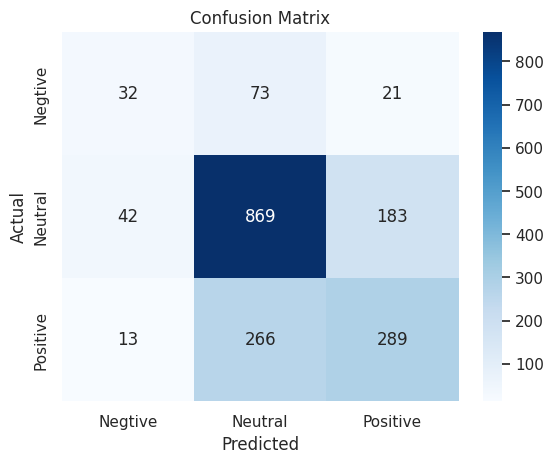

              precision    recall  f1-score   support

    Negative       0.37      0.25      0.30       126
     Neutral       0.72      0.79      0.75      1094
    Positive       0.59      0.51      0.54       568

    accuracy                           0.67      1788
   macro avg       0.56      0.52      0.53      1788
weighted avg       0.65      0.67      0.66      1788



In [97]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_trues, y_preds)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_trues, y_preds,target_names=['Negative','Neutral','Positive']))

#
This roBerta model so far is not perfoming as good as our XGBoost model or our random forest model.  Lets train our model with our custom data which will most likely improve the performance.

In [98]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [99]:
torch.cuda.is_available()

True

In [100]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [101]:
# Convert X_train and y_train to PyTorch tensors
train_encodings = tokenizer(X_train.tolist(),
                            padding=True, truncation=True,max_length=512,
                            return_tensors='pt',add_special_tokens=True).data
# Convert y_train to a tensor
train_labels = torch.tensor(y_train.reset_index(drop=True))


In [102]:
# Convert X_val and y_val to PyTorch tensors
val_encodings = tokenizer(X_val.tolist(),
                            padding=True, truncation=True,max_length=512,
                            return_tensors='pt',add_special_tokens=True).data
# Convert y_train to a tensor
val_labels = torch.tensor(y_val.reset_index(drop=True))


In [103]:
# Combine inputs and labels into a single TensorDataset
val_dataset = torch.utils.data.TensorDataset(val_encodings['input_ids'],
                                               val_encodings['attention_mask'],
                                               val_labels)



In [104]:
# Combine inputs and labels into a single TensorDataset
train_dataset = torch.utils.data.TensorDataset(train_encodings['input_ids'],
                                               train_encodings['attention_mask'],
                                               train_labels)



In [105]:
# Create a PyTorch DataLoader for the training set
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


In [106]:
# Create a PyTorch DataLoader for the validation set
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

In [107]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(bertweet.parameters(), lr=5e-5)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [110]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
bertweet.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [111]:
# Train the model
for epoch in range(3):
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = bertweet(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()


In [112]:
# Evaluate the model on the test set
bertweet.eval()
y_pred = []
with torch.no_grad():
    for batch in test_loader:
        # Move batch to device
        batch = tuple(t.to(device) for t in batch)

        # Unpack inputs and labels
        inputs, attention_mask, labels = batch

        # Forward pass
        outputs = bertweet(inputs, attention_mask=attention_mask)

        # Get predicted labels
        _, predicted = torch.max(outputs.logits, 1)

        # Move predicted labels to CPU and append to y_pred
        y_pred.extend(predicted.cpu().tolist())

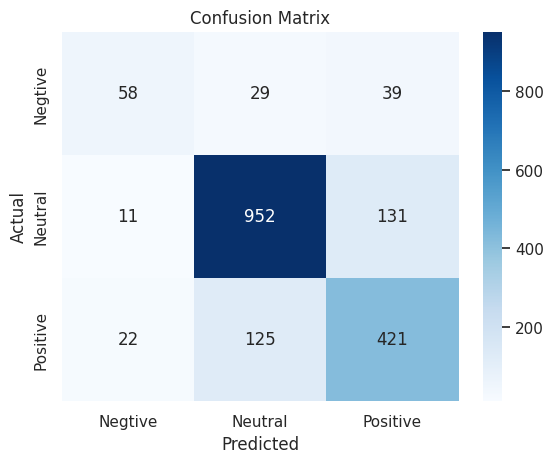

              precision    recall  f1-score   support

    Negative       0.64      0.46      0.53       126
     Neutral       0.86      0.87      0.87      1094
    Positive       0.71      0.74      0.73       568

    accuracy                           0.80      1788
   macro avg       0.74      0.69      0.71      1788
weighted avg       0.80      0.80      0.80      1788



In [113]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred,target_names=['Negative','Neutral','Positive']))

the model trained on our data achieved an overall accuracy of 0.80, with the Neutral class having the highest F1-score (0.87). The macro-average F1-score for all classes was 0.71, indicating that the model performed reasonably well in classifying the data. This has been our best performing model so far